# 📂 Importing packages
This line installs the Pingouin library. You can find the documentation for the library here: https://pingouin-stats.org/build/html/index.html

In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.3 MB/s eta 0:00:00


In [ ]:
# --- 1. Import packages ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import pingouin as pg
import kagglehub
import os

# Set style
sns.set_theme(style="whitegrid", context="talk", palette="muted")

# 📂 Load Dataset

In this part, we will **load and inspect** a dataset containing information about students’ study habits and exam performance.

The dataset informations can be found here:  
🔗 [Student Exam Score Dataset (Kaggle)](https://www.kaggle.com/datasets/grandmaster07/student-exam-score-dataset-analysis)

It contains information about:
- Hours studied per day  
- Sleep hours per day  
- Attendance percentage  
- Previous exam scores  
- Final exam scores  

Our goal is to compare two groups of students to assess the impact on exam performance and to develop a model that identifi
es and predicts the variables influencing exam outcomes.

In [ ]:
# Download latest version of the dataset
path = kagglehub.dataset_download("grandmaster07/student-exam-score-dataset-analysis")

print("Path to dataset files:", path)
print("Files:", os.listdir(path))

# Load one of the CSV files
math_path = os.path.join(path, "student_exam_scores.csv")

Using Colab cache for faster access to the 'student-exam-score-dataset-analysis' dataset.
Path to dataset files: /kaggle/input/student-exam-score-dataset-analysis
Files: ['student_exam_scores.csv']


### 🧩 Exercise 1 — Load and Inspect Data

1. Load the dataset into a pandas DataFrame.  
2. Display the first few rows using `df.head()`.  
3. Use `df.info()` and `df.describe()` to understand the structure of the dataset.

💡 **Hint:** Choose the file `student_exam_scores.csv` inside the downloaded folder.

In [ ]:
# Load the dataset
df = pd.read_csv("...")

# Display the first few rows

# Understand the structure of the dataset

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


### 🧩 Exercise 2 — Basic Exploration

Answer the following questions:

1. How many rows and columns does the dataset contain?  
2. What are the column names and their data types?  
3. Are there any missing values?  
4. What are the minimum and maximum exam scores?

Try using:
```python
df.shape
df.columns
df.info()
df.isnull().sum()
df.describe()

In [ ]:
# HERE

# 🧮 Independent Samples t-Test

In this section, we will use a **t-test** to compare the mean exam scores between two groups of students:
- those who studied **more than 5 hours**, and
- those who studied **5 hours or less**.

A t-test allows us to check whether the difference between the two group means is **statistically significant**.

We will use the [`pingouin`](https://pingouin-stats.org/) library, which provides convenient statistical tools for data analysis in Python.

### Questions

**Q1.** What are the two groups being compared here?  
**Q2.** What is the null hypothesis (H₀) in this test?  
**Q3.** What does the T-value tell us?  
**Q4.** The p-value is. What does that imply?  
**Q5.** Interpret the 95% confidence interval.

🧩 **Hint:**  
- If the p-value is very small, it means the observed difference is very unlikely under the null hypothesis.  
- The confidence interval shows the range of plausible values for the mean difference between the two groups.

In [ ]:
# Create two groups based on study time.
group1 = df[df[''] > 5]['']
group2 = df[df[''] <= 5]['']

# Run an independent t-test using the pingouin package
ttest = pg.ttest()
print(ttest)

                T         dof alternative         p-val          CI95%  \
T-test  12.572273  187.334445   two-sided  1.108441e-26  [7.62, 10.45]   

         cohen-d       BF10 power  
T-test  1.753886  4.987e+23   NaN  


### 💬 Reflection Questions

**R1.** How does this statistical evidence relate to your expectations about study time and performance?  

**R2.** What potential confounding variables could still explain the difference (e.g., motivation, prior ability, teaching quality)?  

**R3.** Would you expect a similar effect if you split students by *sleep hours* or *attendance* instead?  
Try modifying the code above to test these hypotheses.

# 🔗 Correlation Analysis

Before running regression models, it’s useful to examine how variables are related to one another.

A **correlation** measures the **strength and direction** of a linear relationship between two continuous variables:
- A value close to **+1** means a strong positive relationship.
- A value close to **–1** means a strong negative relationship.
- A value near **0** means no linear relationship.

We will start by checking the relationship between **hours studied** and **exam score**, then visualize correlations among all numeric variables.

           n         r         CI95%         p-val       BF10  power
pearson  200  0.776751  [0.72, 0.83]  1.271981e-41  2.033e+38    1.0


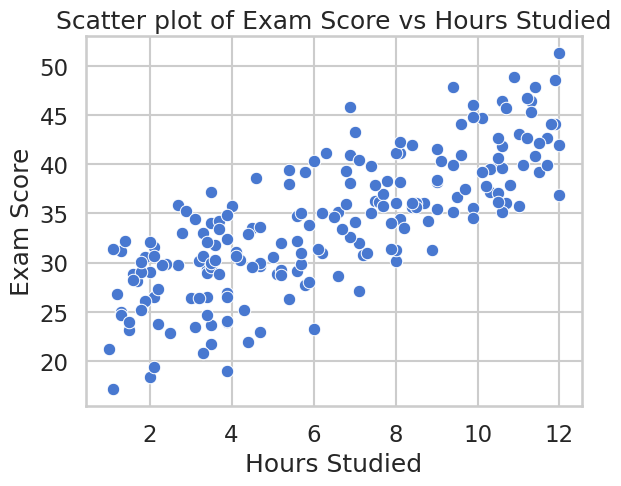

In [ ]:
# Select variables
x = df[""]
y = df[""]

# Calculate Pearson correlation
correlation = pg.corr(x, y, method='pearson')
print(correlation)

# Plot scatterplot
sns.scatterplot(x=x, y=y)
plt.title("Scatter plot of Exam Score vs Hours Studied")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.show()

### 🧠 Interpretation Questions

**Q1.** Is the relationship between `hours_studied` and `exam_score` positive or negative?  
**Q2.** What does the Pearson correlation coefficient tell you about the strength of the relationship?  
**Q3.** Does the scatterplot show a roughly linear pattern?  
**Q4.** Are there any visible outliers that could affect the correlation?

### 🧮 Correlation Matrix

Now, let’s explore how *all numeric variables* in the dataset are correlated.

This will help us identify which variables are most related to exam performance — and therefore, which ones might be useful predictors in our statistical models.

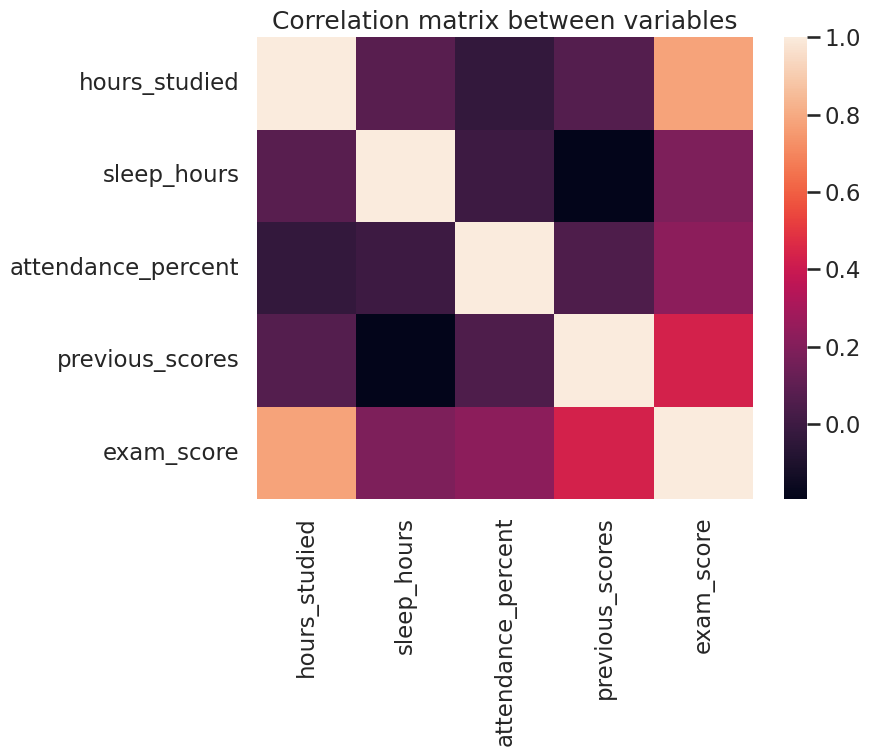

In [ ]:
# Select only numeric columns
num_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr = num_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr)
plt.title("Correlation matrix between variables")
plt.show()

### 🧩 Interpretation Question

**Q1.** Look at the correlation heatmap above.  
Which variables appear most strongly correlated with `exam_score`?  
Are the correlations positive or negative?  

**Q2.** How could these relationships inform which variables you include in your regression model?  

💡 *Hint:* Variables with stronger correlations (positive or negative) are often better predictors in linear models — but beware of multicollinearity!

# 📈 Linear Regression: Predicting Exam Performance

In this section, we will use **linear regression** to model how students’ study habits predict their exam performance.

We’ll start with a **simple linear regression** — using only one predictor (`hours_studied`) — and then build a **multiple linear regression** by adding more variables (e.g., `sleep_hours`).

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     301.2
Date:                Tue, 21 Oct 2025   Prob (F-statistic):           1.27e-41
Time:                        06:16:42   Log-Likelihood:                -573.90
No. Observations:                 200   AIC:                             1152.
Df Residuals:                     198   BIC:                             1158.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.6184      0.668     35.340

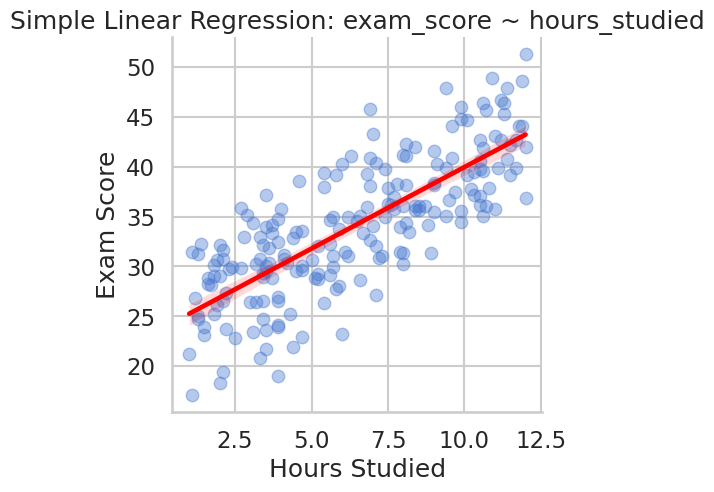

In [ ]:
# --- 1. Simple Linear Model: exam_score ~ hours_studied ---
model1 = ols("exam_score ~ hours_studied", data=df).fit()
print(model1.summary())

# Visualize fitted line
sns.lmplot(data=df, x="hours_studied", y="exam_score",
           scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title("Simple Linear Regression: exam_score ~ hours_studied")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.show()

### 🧠 Interpretation Questions (Simple Model)

**Q1.** What is the equation of the fitted regression line?  
*(Hint: exam_score = intercept + slope × hours_studied)*  

**Q2.** Is the coefficient for `hours_studied` positive or negative?  
What does this imply about the relationship between study time and exam scores?  

**Q3.** Look at the R² value in the summary.  
How much of the variation in exam scores is explained by hours studied alone?  
Is this a strong model?  

**Q4.** Examine the p-value for `hours_studied`.  
Is the relationship statistically significant (p < 0.05)?

# 📈 Multiple Linear Regression

Now let’s include a second variable — `sleep_hours` — to see if it improves our ability to predict exam scores.

In [ ]:
# --- 5. Multiple Linear Model: Egg Size ~ Year + Temperature + Species ---

model2 = ols("exam_score ~ hours_studied + sleep_hours", data=df).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             exam_score   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     160.5
Date:                Tue, 21 Oct 2025   Prob (F-statistic):           4.32e-42
Time:                        06:07:26   Log-Likelihood:                -569.67
No. Observations:                 200   AIC:                             1145.
Df Residuals:                     197   BIC:                             1155.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        19.8920      1.436     13.850      0.000      17.060      22.724
hours_studied     1.6131      0.093     17.399      0.000       1.430       1.796
sleep_hours       0.5828      0.200      2.916      0.004       0.189       0.977
==============================================================================
Omnibus:                        3.132   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.209   Jarque-Bera (JB):                2.201
Skew:                          -0.056   Prob(JB):                        0.333
Kurtosis:                       2.499   Cond. No.                         46.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 🧩 Interpretation Questions (Multiple Model)

**Q5.** Which predictors are statistically significant in the multiple regression model?  
**Q6.** Does `sleep_hours` have a positive or negative effect on exam score?  
Does it make sense in context?  

**Q7.** Compare the R² values of both models.  
Did adding `sleep_hours` improve the model’s explanatory power?  

In [ ]:

# --- 6. Compare models ---

print("\nR² comparison:")
print(f"Simple model: {model1.rsquared:.3f}")
print(f"Multiple model: {model2.rsquared:.3f}")



R² comparison:
Simple model: 0.603
Multiple model: 0.620


### 💬 Reflection Questions

**R1.** What does a higher R² tell us about model fit?  
**R2.** Could there be diminishing returns to studying longer hours?  
How might you test for that (e.g., by adding a quadratic term)?  
**R3.** What other variables could be added to further improve the model (e.g., attendance, previous scores, motivation)?  